The datasets used in this project include:

Drivers: Information about drivers.

Qualifying: Qualifying results for drivers.

Races: Details of each race.

Results: Results of each race.


The project will utilize four datasets: Drivers, Qualifying, Races, and Results, all of which provide comprehensive information on Formula 1 races from the past five years. The Drivers dataset contains details about the drivers, such as their names, nationalities, and racing IDs. The Qualifying dataset includes qualifying session data, such as driver positions and times. The Races dataset provides metadata on the races, including circuit names, race dates, and locations. Finally, the Results dataset captures race outcomes, including finishing positions, points scored, and additional performance metrics. The goal of this project is to leverage these datasets to build a binary classification model that predicts the winner of a specific upcoming race. To reach this goal, I will have to merge some of these datasets.

In [1]:
import pandas as pd
import numpy as np

results = pd.read_csv('results.csv')
qualifying = pd.read_csv('qualifying.csv')
drivers = pd.read_csv('drivers.csv')
races = pd.read_csv('races.csv')
constructors = pd.read_csv('constructors.csv')


#Cleaning and Filtering data

The results dataset consists of 26519 entries, and contains 18 columns in total to describe the results of each race for every driver, it includes results like positions, points gained by a driver, number of laps ran by every driver, total time of race, fastest lap, etc.

In [2]:
results.info()
results.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26519 entries, 0 to 26518
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26519 non-null  int64  
 1   raceId           26519 non-null  int64  
 2   driverId         26519 non-null  int64  
 3   constructorId    26519 non-null  int64  
 4   number           26519 non-null  object 
 5   grid             26519 non-null  int64  
 6   position         26519 non-null  object 
 7   positionText     26519 non-null  object 
 8   positionOrder    26519 non-null  int64  
 9   points           26519 non-null  float64
 10  laps             26519 non-null  int64  
 11  time             26519 non-null  object 
 12  milliseconds     26519 non-null  object 
 13  fastestLap       26519 non-null  object 
 14  rank             26519 non-null  object 
 15  fastestLapTime   26519 non-null  object 
 16  fastestLapSpeed  26519 non-null  object 
 17  statusId    

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000
mean,13260.940986,546.376560,274.357291,49.801161,11.145820,12.814812,1.959578,46.228251,17.317056
std,7656.813206,309.642244,279.275606,61.091426,7.213453,7.677869,4.306475,29.577860,26.081700
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6630.500000,298.000000,57.000000,6.000000,5.000000,6.000000,0.000000,23.000000,1.000000
50%,13260.000000,527.000000,170.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000
75%,19889.500000,803.000000,385.000000,60.000000,17.000000,18.000000,2.000000,66.000000,14.000000
max,26524.000000,1132.000000,860.000000,215.000000,34.000000,39.000000,50.000000,200.000000,141.000000


The qualifying dataset contains 10254 entries and consists of 9 columns to describe the results for qualifying day. The columns consists of the driver's results for qualifying day for every race, the position avhieved by every racer, and it contains exact time achieved by racers on the different stages of qualifying Q1, Q2, and Q3

In [3]:
qualifying.info()
qualifying.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10254 entries, 0 to 10253
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      10254 non-null  int64 
 1   raceId         10254 non-null  int64 
 2   driverId       10254 non-null  int64 
 3   constructorId  10254 non-null  int64 
 4   number         10254 non-null  int64 
 5   position       10254 non-null  int64 
 6   q1             10254 non-null  object
 7   q2             10241 non-null  object
 8   q3             10227 non-null  object
dtypes: int64(6), object(3)
memory usage: 721.1+ KB


,qualifyId,raceId,driverId,constructorId,number,position
count,10254.000000,10254.000000,10254.000000,10254.000000,10254.000000,10254.000000
mean,5141.499415,612.572850,333.345231,46.884338,18.526624,11.212112
std,2976.371659,425.918335,387.004197,72.432640,18.243795,6.270548
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2565.250000,140.000000,16.000000,4.000000,7.000000,6.000000
50%,5129.500000,865.000000,56.000000,9.000000,14.000000,11.000000
75%,7713.750000,997.000000,822.000000,30.000000,22.000000,16.000000
max,10311.000000,1132.000000,860.000000,215.000000,99.000000,28.000000


The drivers dataset consist of 859 entries, and consists of 9 columns. These columns represent the driver's name, driver's race number, their first and last name, their nationality, and their day of birth

In [4]:
drivers.info()
drivers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     859 non-null    int64 
 1   driverRef    859 non-null    object
 2   number       859 non-null    object
 3   code         859 non-null    object
 4   forename     859 non-null    object
 5   surname      859 non-null    object
 6   dob          859 non-null    object
 7   nationality  859 non-null    object
 8   url          859 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.5+ KB


,driverId
count,859.000000
mean,430.059371
std,248.213115
min,1.000000
25%,215.500000
50%,430.000000
75%,644.500000
max,860.000000


The races dataset contains 1125 entries, and 18 columns. These columns include the year that happened the corresponding race, their circuit name, and the exact date that happened, etc.

In [5]:
races.info()
races.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         1125 non-null   object
 7   url          1125 non-null   object
 8   fp1_date     1125 non-null   object
 9   fp1_time     1125 non-null   object
 10  fp2_date     1125 non-null   object
 11  fp2_time     1125 non-null   object
 12  fp3_date     1125 non-null   object
 13  fp3_time     1125 non-null   object
 14  quali_date   1125 non-null   object
 15  quali_time   1125 non-null   object
 16  sprint_date  1125 non-null   object
 17  sprint_time  1125 non-null   object
dtypes: int64(4), object(14)
memory usage: 158.3+ KB


,raceId,year,round,circuitId
count,1125.000000,1125.000000,1125.000000,1125.000000
mean,565.710222,1992.703111,8.579556,23.889778
std,328.813817,20.603848,5.159910,19.633527
min,1.000000,1950.000000,1.000000,1.000000
25%,282.000000,1977.000000,4.000000,9.000000
50%,563.000000,1994.000000,8.000000,18.000000
75%,845.000000,2011.000000,13.000000,34.000000
max,1144.000000,2024.000000,24.000000,80.000000


Overall on these datasets, they do not have missing values. So, I will just get rid of columns that don't really bring value. Also, since these datasets contain data from 1950 to 2024, I will be using data from the last 5 years (2019 - 2023) to achieve the overall goal of this project.

I cleaned the driver dataset, I dropped the url column, the nationality column, and I replaced their day of birth with their age.

In [6]:
#Drop the url column from drivers dataset
drivers = drivers.drop('url', axis=1)

#Drop the nationality column from drivers dataset
drivers = drivers.drop('nationality', axis=1)

#Replce the drivers day of birth with their age
age = 2024 - pd.to_datetime(drivers['dob']).dt.year
drivers['age'] = age
drivers = drivers.drop('dob', axis=1)


I cleaned the races dataset, I dropped the url column, time, and the schedule time for every section held during a grand prix weekend. Also, I kept the races held from 2019 to 2024

In [7]:
#Drop the url column from the races dataset
races = races.drop('url', axis=1)

#Drop the time column from the races dataset
races = races.drop('time', axis=1)

#Drop fp1_date	fp1_time	fp2_date	fp2_time	fp3_date	fp3_time	quali_date	quali_time	sprint_date	sprint_time
races = races.drop(['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1)

#Keep races held from 2019 to 2024
races = races[races['year'] >= 2019]

print(races)

      raceId  year  round  circuitId                    name        date
997     1010  2019      1          1   Australian Grand Prix  2019-03-17
998     1011  2019      2          3      Bahrain Grand Prix  2019-03-31
999     1012  2019      3         17      Chinese Grand Prix  2019-04-14
1000    1013  2019      4         73   Azerbaijan Grand Prix  2019-04-28
1001    1014  2019      5          4      Spanish Grand Prix  2019-05-12
...      ...   ...    ...        ...                     ...         ...
1120    1140  2024     20         32  Mexico City Grand Prix  2024-10-27
1121    1141  2024     21         18    São Paulo Grand Prix  2024-11-03
1122    1142  2024     22         80    Las Vegas Grand Prix  2024-11-23
1123    1143  2024     23         78        Qatar Grand Prix  2024-12-01
1124    1144  2024     24         24    Abu Dhabi Grand Prix  2024-12-08

[128 rows x 6 columns]


I cleaned the results dataset,I kept the results from races held from 2019 - 2024

In [8]:
#Add a year column, get the date column from races and with the raceId assign the corresponding year in results dataset
results['year'] = results['raceId'].map(races.set_index('raceId')['year'])

#Filter the results dataset to keep only the raceId found in races dataset, to only keep results from 2019 - 2024
results = results[results['raceId'].isin(races['raceId'])]

print(results)

       resultId  raceId  driverId  constructorId number  grid position  \
24197     24203    1010       822            131     77     2        1   
24198     24204    1010         1            131     44     1        2   
24199     24205    1010       830              9     33     4        3   
24200     24206    1010        20              6      5     3        4   
24201     24207    1010       844              6     16     5        5   
...         ...     ...       ...            ...    ...   ...      ...   
26514     26520    1132       839            214     31    18       16   
26515     26521    1132       815              9     11     0       17   
26516     26522    1132       855             15     24    14       18   
26517     26523    1132       847            131     63     1       \N   
26518     26524    1132       842            214     10    19       \N   

      positionText  positionOrder  points  laps         time milliseconds  \
24197            1              1 

I filtered the qualifying dataset to only get the qualifying results from 2019 - 2024

In [9]:
#Add a year column, get the date column from races and with the raceId assign the corresponding year in qualifying dataset
qualifying['year'] = qualifying['raceId'].map(races.set_index('raceId')['year'])

#Filter the qualifying dataset to only get qualifying races found in the filtered races dataset
qualifying = qualifying[qualifying['raceId'].isin(races['raceId'])]

print(qualifying)

       qualifyId  raceId  driverId  constructorId  number  position        q1  \
7936        7960    1010         1            131      44         1  1:22.043   
7937        7961    1010       822            131      77         2  1:22.367   
7938        7962    1010        20              6       5         3  1:22.885   
7939        7963    1010       830              9      33         4  1:22.876   
7940        7964    1010       844              6      16         5  1:22.017   
...          ...     ...       ...            ...     ...       ...       ...   
10249      10307    1132       822             15      77        16  1:32.431   
10250      10308    1132       825            210      20        17  1:32.905   
10251      10309    1132       839            214      31        18  1:34.557   
10252      10310    1132       815              9      11        19  1:38.348   
10253      10311    1132       842            214      10        20  1:39.804   

             q2        q3  

I filtered drivers dataset to only get the drivers participating in the 2024 championship.

In [10]:
# Filter drivers participating in the 2024 championship
# Assuming 'races' and 'results' have data for 2024
races_2024 = races[races['year'] == 2024]
results_2024 = results[results['raceId'].isin(races_2024['raceId'])]

# Get unique driver IDs for the 2024 season
drivers_2024_ids = results_2024['driverId'].unique()

#print(drivers_2024_ids)

# Get the drivers name from driver dataset using the drivers ids
drivers_2024_names = drivers[drivers['driverId'].isin(drivers_2024_ids)]

print(drivers_2024_names)

     driverId        driverRef number code   forename     surname  age
0           1         hamilton     44  HAM      Lewis    Hamilton   39
3           4           alonso     14  ALO   Fernando      Alonso   43
452       842            gasly     10  GAS     Pierre       Gasly   28
807       807       hulkenberg     27  HUL       Nico  Hülkenberg   37
814       815            perez     11  PER     Sergio       Pérez   34
816       817        ricciardo      3  RIC     Daniel   Ricciardo   35
821       822           bottas     77  BOT   Valtteri      Bottas   35
824       825  kevin_magnussen     20  MAG      Kevin   Magnussen   32
829       830   max_verstappen     33  VER        Max  Verstappen   27
831       832            sainz     55  SAI     Carlos       Sainz   30
838       839             ocon     31  OCO    Esteban        Ocon   28
839       840           stroll     18  STR      Lance      Stroll   26
842       844          leclerc     16  LEC    Charles     Leclerc   27
844   

In [11]:
#Filter the constructors dataset to get only the existing constructors from 2019 - 2024
constructors = constructors[constructors['constructorId'].isin(results['constructorId'].unique())]

#Remove the url column from constructors dataset
constructors = constructors.drop('url', axis=1)


print(constructors)

     constructorId constructorRef            name nationality
0                1        mclaren         McLaren     British
2                3       williams        Williams     British
3                4        renault         Renault      French
4                5     toro_rosso      Toro Rosso     Italian
5                6        ferrari         Ferrari     Italian
8                9       red_bull        Red Bull    Austrian
14              15         sauber          Sauber       Swiss
49              51           alfa      Alfa Romeo       Swiss
115            117   aston_martin    Aston Martin     British
129            131       mercedes        Mercedes      German
207            210           haas    Haas F1 Team    American
208            211   racing_point    Racing Point     British
209            213     alphatauri      AlphaTauri     Italian
210            214         alpine  Alpine F1 Team      French
211            215             rb      RB F1 Team     Italian


#Visualizing data

In this graph we can visualize trends in driver performance in the Monaco Grand Prix over the past 5 years. Which is the race I will try to predict the winner. There is no information for 2020, because it was canceled that year.

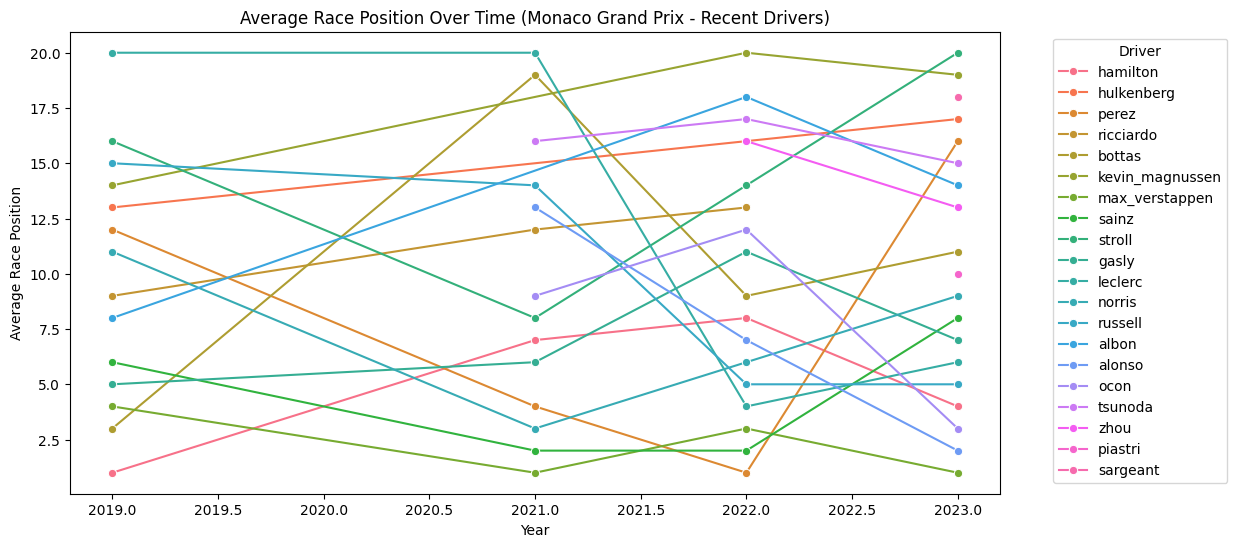

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter races for the Monaco Grand Prix from the past 5 years
monaco_gp_recent = races[(races['name'].str.contains("Monaco Grand Prix")) & (races['year'] < 2024)]

# Merge qualifying data with Monaco GP data
qualifying_monaco_gp_recent = qualifying[qualifying['raceId'].isin(monaco_gp_recent['raceId'])]

# Merge results data with Monaco GP data
results_monaco_gp_recent = results[results['raceId'].isin(monaco_gp_recent['raceId'])]

# Aggregate data
avg_positions = results_monaco_gp_recent.groupby(['year', 'driverId'])['positionOrder'].mean().reset_index()
avg_positions['driver'] = avg_positions['driverId'].map(drivers.set_index('driverId')['driverRef'])

# Filter avg_positions to include only 2024 drivers
recent_drivers_avg_positions = avg_positions[avg_positions['driverId'].isin(drivers_2024_ids)]

# Plot only for recent drivers
plt.figure(figsize=(12, 6))
sns.lineplot(data=recent_drivers_avg_positions, x='year', y='positionOrder', hue='driver', marker='o')
plt.title('Average Race Position Over Time (Monaco Grand Prix - Recent Drivers)')
plt.ylabel('Average Race Position')
plt.xlabel('Year')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Visualize the relationship between qualifying position and race outcomes. For this I did a boxplot of qualifying positions for race winners vs. non-winners

<ipython-input-13-81787659ebbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_monaco_gp_recent['winner'] = results_monaco_gp_recent['positionOrder'] == 1


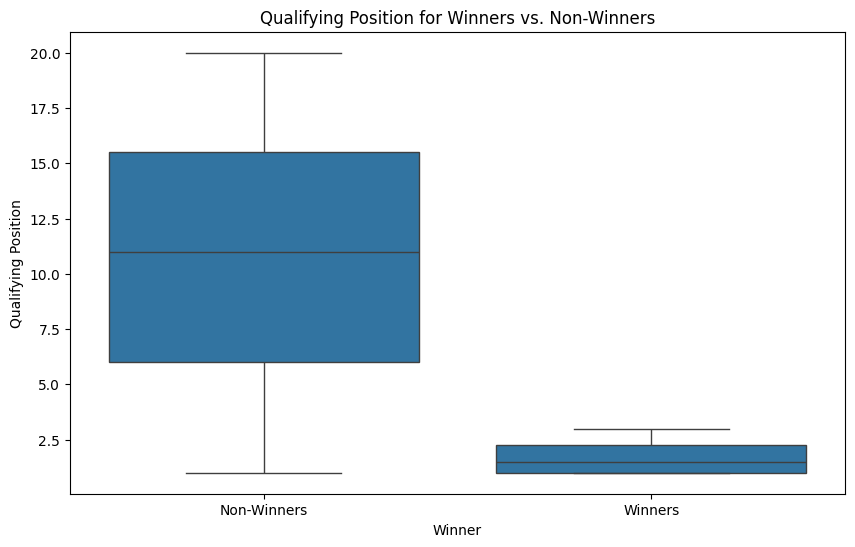

In [13]:
# Add a 'winner' column
results_monaco_gp_recent['winner'] = results_monaco_gp_recent['positionOrder'] == 1

# Merge with qualifying data
merged_data = qualifying_monaco_gp_recent.merge(results_monaco_gp_recent, on=['raceId', 'driverId'])

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='winner', y='grid', showfliers=False)
plt.title('Qualifying Position for Winners vs. Non-Winners')
plt.xlabel('Winner')
plt.ylabel('Qualifying Position')
plt.xticks([0, 1], ['Non-Winners', 'Winners'])
plt.show()


Compare average performance of drivers at the British GP track over the past 5 years. I did a Bar chart of average race position for each driver.

<ipython-input-14-7a60368aba59>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_race_positions_recent, x='positionOrder', y='driver', palette='viridis')


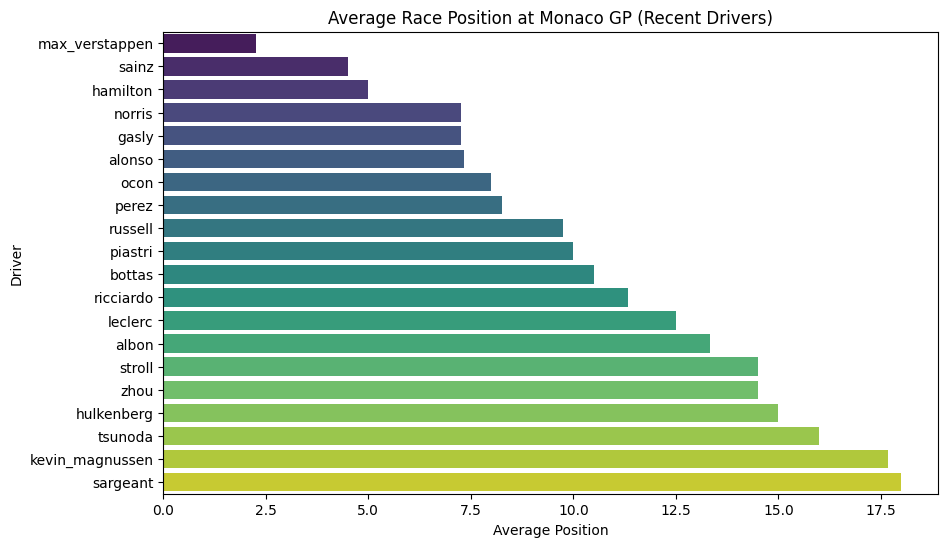

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data for average race positions
avg_race_positions = results_monaco_gp_recent.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_positions['driver'] = avg_race_positions['driverId'].map(drivers.set_index('driverId')['driverRef'])

# Filter to include only recent drivers
avg_race_positions_recent = avg_race_positions[avg_race_positions['driverId'].isin(drivers_2024_ids)]

# Sort by average position
avg_race_positions_recent = avg_race_positions_recent.sort_values(by='positionOrder')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_race_positions_recent, x='positionOrder', y='driver', palette='viridis')
plt.title('Average Race Position at Monaco GP (Recent Drivers)')
plt.xlabel('Average Position')
plt.ylabel('Driver')
plt.show()



Show the relationships between key numerical features like average qualifying position, average race position, standard deviation of race positions for each driver (consistency), the average position improvement (position improvement from qualifying to race), average position of drivers on all races and driver constructor(team) performance

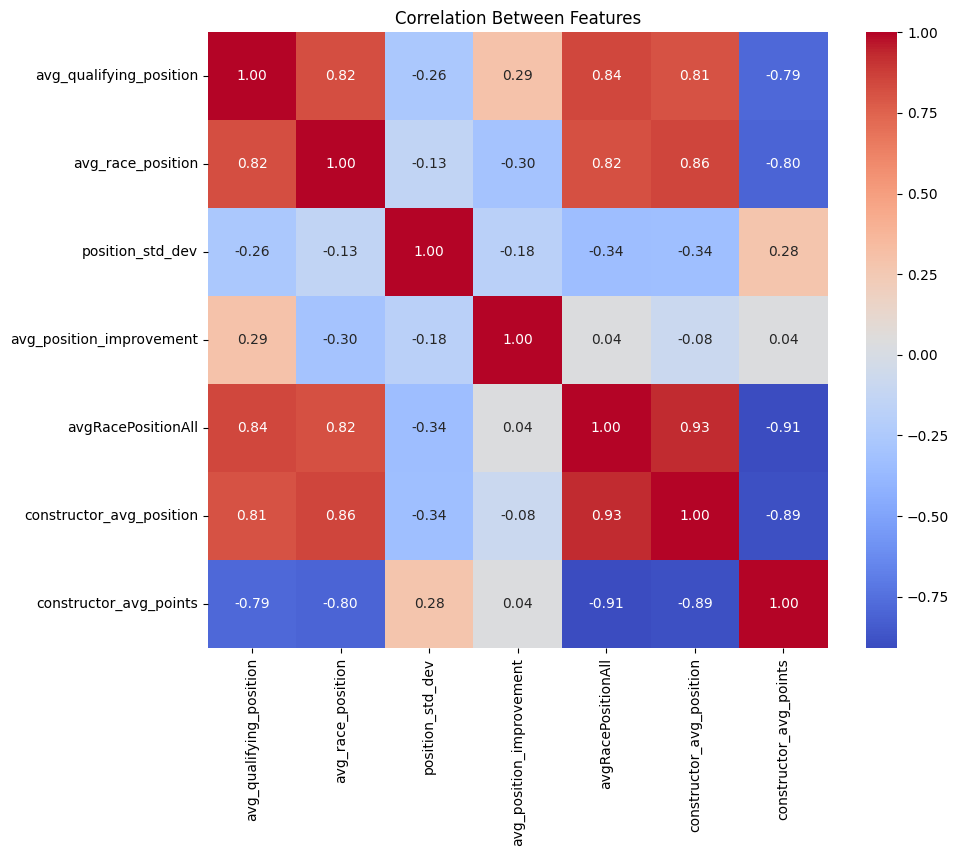

In [15]:
# Select features

#Driver Performance Features:

#Average qualifying position of drivers in monaco gp
avg_qualifying_position = qualifying_monaco_gp_recent.groupby('driverId')['position'].mean().reset_index().rename(columns={'position': 'avg_qualifying_position'})
#Average race position of all drivers in monaco gp
avg_race_position = results_monaco_gp_recent.groupby('driverId')['positionOrder'].mean().reset_index().rename(columns={'positionOrder': 'avg_race_position'})

#Consistency reflects the variance in a driver’s race results
consistency = results_monaco_gp_recent.groupby('driverId')['positionOrder'].std().reset_index()
consistency['driver'] = consistency['driverId'].map(drivers.set_index('driverId')['driverRef'])
consistency.rename(columns={'positionOrder': 'position_std_dev'}, inplace=True)

#The average difference position from qualifying to race results
#Drivers who consistently improve from their qualifying position during the race demonstrate strong race-day performance.
qualifying_to_race_improvement = (qualifying_monaco_gp_recent.groupby('driverId')['position'].mean() -
                                 results_monaco_gp_recent.groupby('driverId')['positionOrder'].mean()).reset_index()
qualifying_to_race_improvement.columns = ['driverId', 'avg_position_improvement']

#The average position of a driver on all races
avg_race_positions_all = results.groupby('driverId')['positionOrder'].mean().reset_index()
avg_race_positions_all.rename(columns={'positionOrder': 'avgRacePositionAll'}, inplace=True)


#Constructor (Team) Performance Features:

# Average race position for each constructor(team) in the Monaco GP
constructor_avg_position = results_monaco_gp_recent.groupby('constructorId')['positionOrder'].mean().reset_index()
constructor_avg_position.rename(columns={'positionOrder': 'constructor_avg_position'}, inplace=True)

# Average points scored by each constructor(team) in the Monaco GP
constructor_avg_points = results_monaco_gp_recent.groupby('constructorId')['points'].mean().reset_index()
constructor_avg_points.rename(columns={'points': 'constructor_avg_points'}, inplace=True)

# Merge the two metrics
constructor_performance = constructor_avg_position.merge(constructor_avg_points, on='constructorId')

# Add constructor names for interpretability
constructor_performance['constructor'] = constructor_performance['constructorId'].map(constructors.set_index('constructorId')['name'])

# Merge constructor performance with driver results
results_british_gp_recent = results_monaco_gp_recent.merge(constructor_performance, on='constructorId', how='left')

# Average constructor performance for each driver
driver_constructor_performance = results_british_gp_recent.groupby('driverId')[['constructor_avg_position', 'constructor_avg_points']].mean().reset_index()

# Add driver names for interpretability
driver_constructor_performance['driver'] = driver_constructor_performance['driverId'].map(drivers.set_index('driverId')['driverRef'])



# Combine features into a single dataset
features = avg_qualifying_position.merge(avg_race_position, on='driverId') \
                                  .merge(consistency, on='driverId') \
                                  .merge(qualifying_to_race_improvement, on='driverId') \
                                  .merge(avg_race_positions_all, on='driverId') \
                                  .merge(driver_constructor_performance, on='driverId')


# Select numerical columns for correlation analysis
correlation_data = features[['avg_qualifying_position', 'avg_race_position', 'position_std_dev', 'avg_position_improvement', 'avgRacePositionAll', 'constructor_avg_position', 'constructor_avg_points']]

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Features')
plt.show()


I made a pairwise plot that shows the relationships between pairs of numerical features. It’s a useful tool for exploring pairwise correlations and detecting patterns or trends between variables.

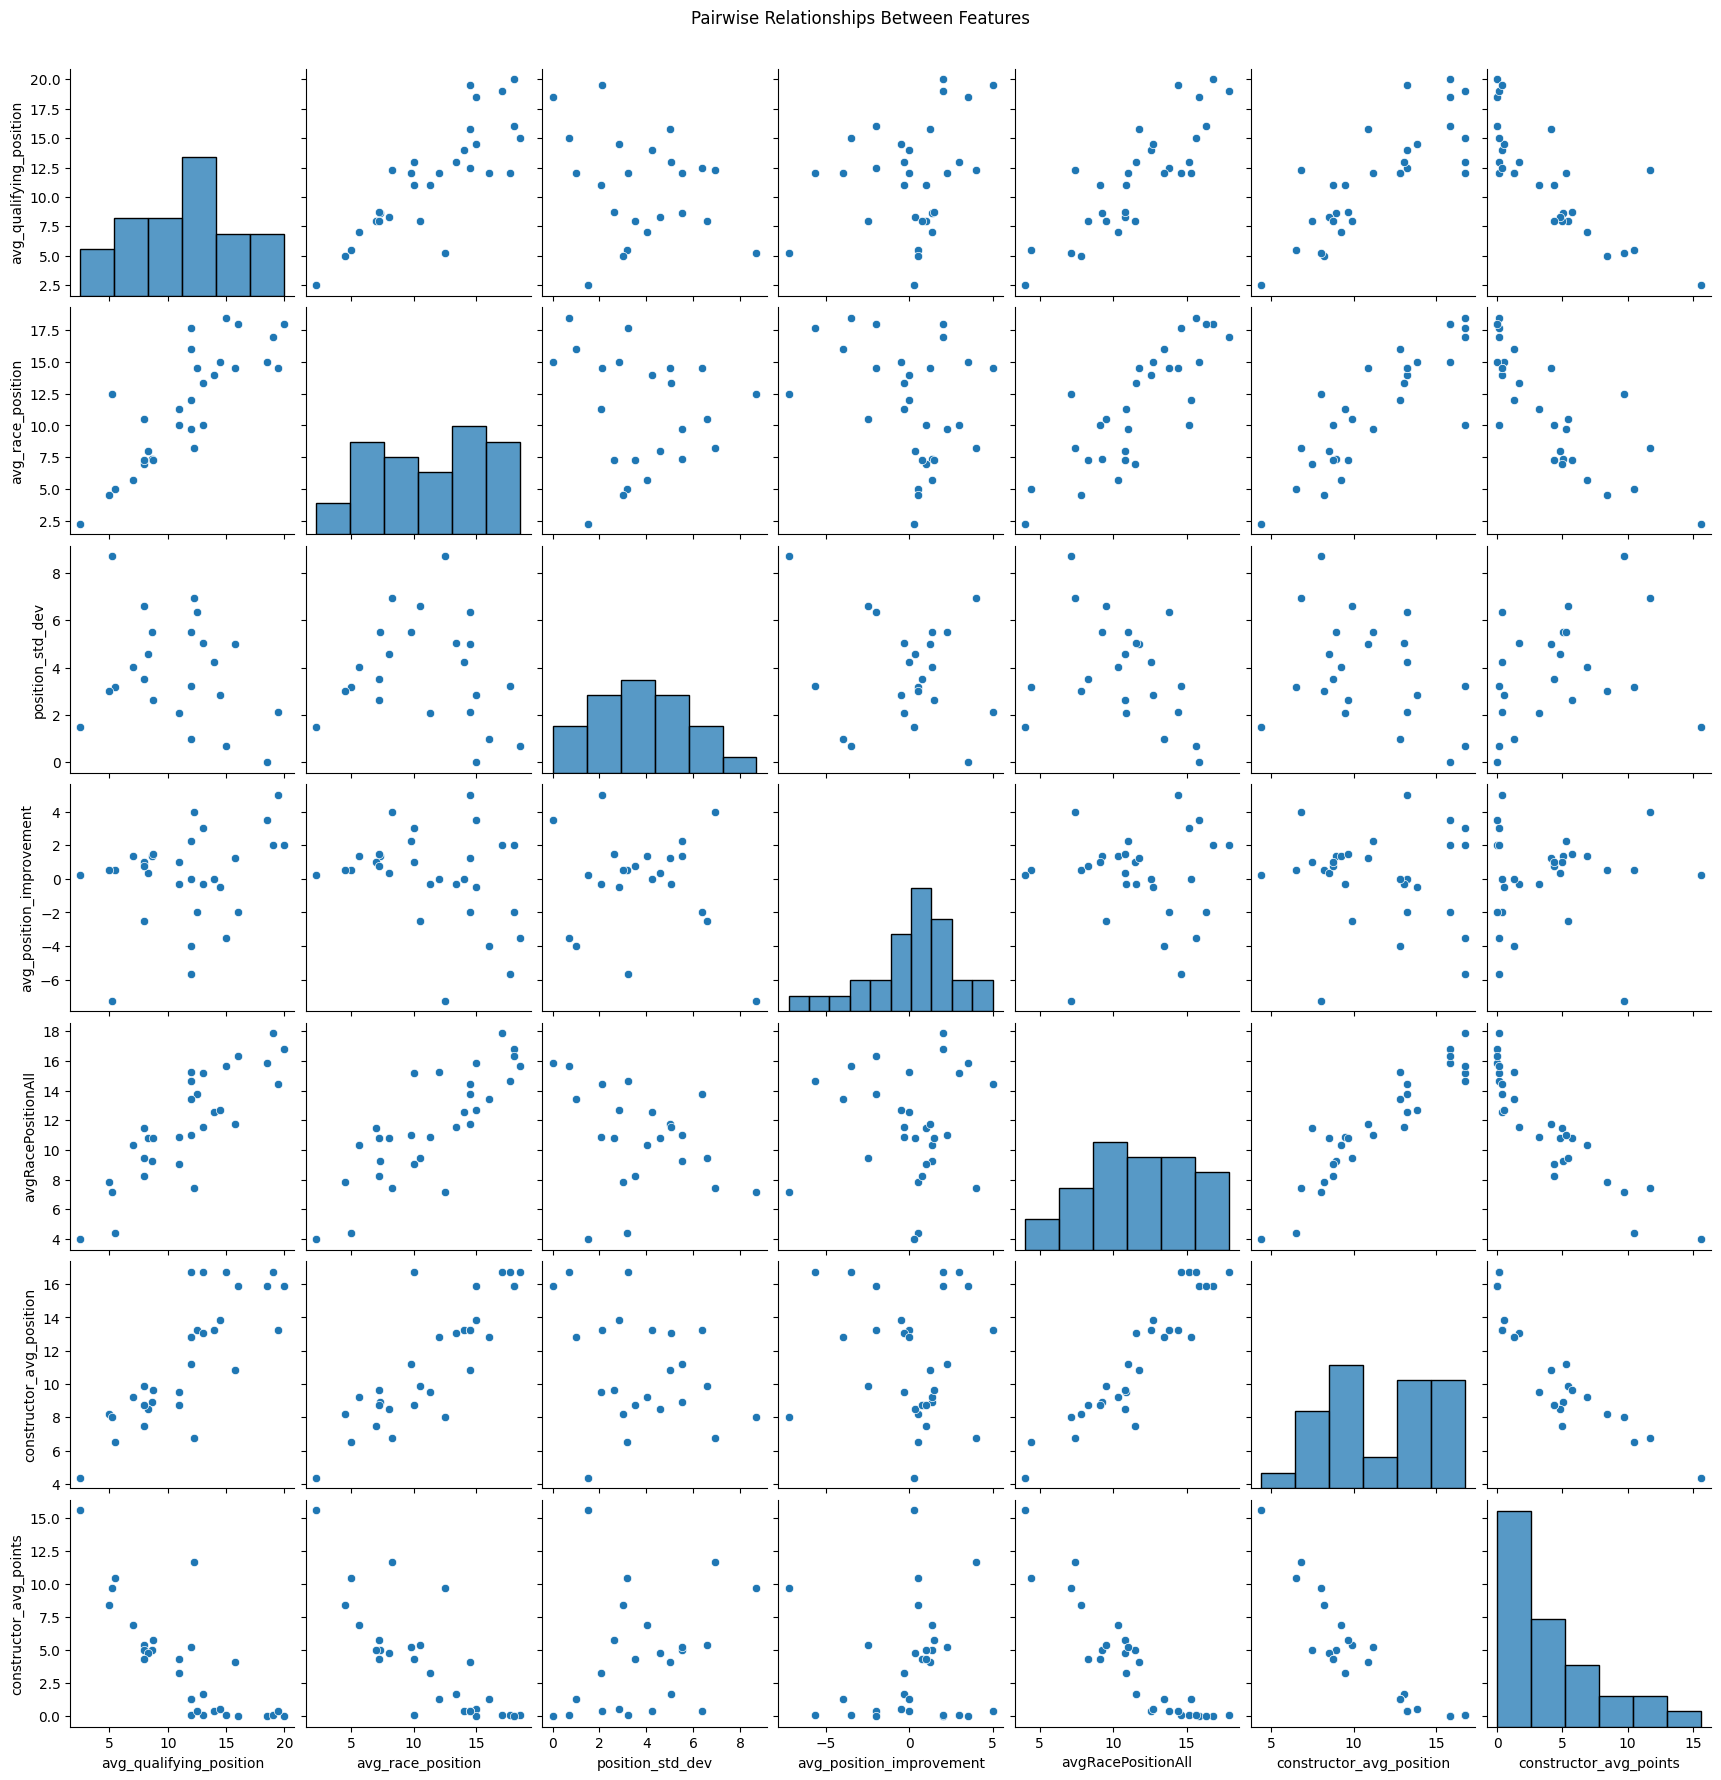

In [16]:
sns.pairplot(correlation_data)
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.show()

#Model Selection and Training

I began by selecting a Random Forest Classifier and Logistic Regression for the prediction task of determining the winner or top-performing drivers at the Monaco GP. I chose these models because:

Random Forest Classifier

- Powerful for Non-Linear Relationships: Random Forest is capable of capturing complex, non-linear relationships in the data, making it well-suited for problems like predicting race winners where interactions between features can be intricate.

- Robust to Overfitting: By averaging the results of multiple decision trees, Random Forest reduces overfitting and provides reliable predictions.

- Feature Importance: It offers insights into which features are most influential in determining the outcome, helping to interpret the model’s decisions.

Logistic Regression

- Simplicity and Interpretability: Logistic Regression is straightforward to implement and interpret. The coefficients directly indicate the influence of each feature on the probability of winning, providing valuable insights.

- Baseline Comparison: Logistic Regression serves as a baseline model to compare with more complex methods, ensuring the added complexity of models like Random Forest is justified.

- Efficient for Small Datasets: Logistic Regression works well with smaller datasets, making it a practical choice for this task.

The models were trained using the features:

- avg_qualifying_position
- avg_race_position
- position_std_dev
- avg_position_improvement
- avgRacePositionAll
- constructor_avg_position
- constructor_avg_points

The target variable (winner) was binary: 1 for winners and 0 for non-winners.


I Ended up removing average race position from features, due to overlap with avgRacePositionAll. avgRacePositionAll is valuable and should be retained, while avg_race_position might be redundant. Most of the time I achieved perfect accuracy (1.0) on the test set, which is not always a realistic result, as it might indicate overfitting. So, I had to change the min_samples_split, which is the minimum number of samples required to split an internal node. Increasing this value forces the model to consider more samples before splitting, preventing overly specific splits that lead to overfitting. Also, I had to change the min_samples_leaf, which is the minimum number of samples a leaf node must have. This ensures that the tree does not grow overly deep with tiny leaves, which can cause overfitting.

#Random Forest Classifier

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

#print(features)

# Create a binary target variable for race winners
results_monaco_gp_recent.loc[:, 'winner'] = results_monaco_gp_recent['positionOrder'] == 1  # Use .loc to avoid SettingWithCopyWarning
race_winners_recent = results_monaco_gp_recent[['raceId', 'driverId', 'winner']]
race_winners_recent = race_winners_recent[race_winners_recent['winner']].drop(columns=['winner'])

# Merge target with features
data_recent = features.merge(race_winners_recent, on='driverId', how='left').fillna(0)

# Prepare data for model
X = data_recent[['avg_qualifying_position',  'position_std_dev', 'avg_position_improvement', 'avgRacePositionAll', 'constructor_avg_position', 'constructor_avg_points']]
y = data_recent['driverId'].apply(lambda x: 1 if x in race_winners_recent['driverId'].values else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Model
#model = RandomForestClassifier(n_estimators=100, random_state=42)

model = RandomForestClassifier(n_estimators=100,
                                 random_state=42,
                                 min_samples_split=5,  # Adjust this value
                                 min_samples_leaf=2,
                                 max_depth = 5)   # Adjust this value
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importance)
print()


# Sample average qualifying and race positions for drivers competing in 2024
latest_qualifying_position = qualifying[qualifying['driverId'].isin(drivers_2024_ids) & qualifying['raceId'].isin(races_2024['raceId'])].groupby('driverId')['position'].mean().reset_index().rename(columns={'position': 'avg_qualifying_position'})
latest_race_position = results[results['driverId'].isin(drivers_2024_ids) & results['raceId'].isin(races_2024['raceId'])].groupby('driverId')['positionOrder'].mean().reset_index().rename(columns={'positionOrder': 'avg_race_position'})

# Merge features for prediction
latest_features = latest_qualifying_position.merge(latest_race_position, on='driverId')

latest_features = latest_features.merge(features[['driverId', 'position_std_dev', 'avg_position_improvement', 'avgRacePositionAll', 'constructor_avg_position', 'constructor_avg_points']], on='driverId', how='left')

X_latest = latest_features[['avg_qualifying_position',  'position_std_dev',
                            'avg_position_improvement', 'avgRacePositionAll',
                            'constructor_avg_position', 'constructor_avg_points']]

# Predict probabilities
proba_predictions = model.predict_proba(X_latest)

# Add probabilities to the DataFrame
latest_features['winner_probability'] = proba_predictions[:, 1]

# Select the driver with the highest probability of winning
latest_features['predicted_winner'] = 0  # Reset predictions
highest_prob_index = latest_features['winner_probability'].idxmax()  # Index of max probability
latest_features.loc[highest_prob_index, 'predicted_winner'] = 1  # Set the highest probability as winner

# Map driver IDs to names
driver_id_to_name = dict(zip(drivers['driverId'], drivers['surname']))
latest_features['driver'] = latest_features['driverId'].map(driver_id_to_name)

# Show predictions
print(latest_features[['driver', 'avg_qualifying_position', 'avg_race_position',
                       'winner_probability', 'predicted_winner']])




Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.50      0.67         2

    accuracy                           0.90        10
   macro avg       0.94      0.75      0.80        10
weighted avg       0.91      0.90      0.89        10

Feature Importances:
                     Feature  Importance
5    constructor_avg_points    0.309915
4  constructor_avg_position    0.245537
3        avgRacePositionAll    0.227990
0   avg_qualifying_position    0.100102
1          position_std_dev    0.096179
2  avg_position_improvement    0.020276

        driver  avg_qualifying_position  avg_race_position  \
0     Hamilton                 7.750000           6.916667   
1       Alonso                10.000000           9.833333   
2   Hülkenberg                11.666667          10.916667   
3        Pérez                 8.250000           7.833333   
4    Ricciardo        

Model Performance :

- Accuracy: 0.90 — The model is correctly predicting 90% of the samples in the test set.

- Precision for Class 1 (Winner): 1.00 — When the model predicts a winner, it is always correct.

- Recall for Class 1 (Winner): 0.50 — Out of the actual winners, the model correctly identifies only half of them.

Feature Importances:

- constructor_avg_points: 30.99% importance — The average points scored by the driver's constructor strongly influence predictions, aligning with domain expectations since strong constructors often field winning cars.

- constructor_avg_position: 24.55% importance — Reflects how well the constructor's drivers perform on average in races.

- avgRacePositionAll: 22.80% importance — Average race position for all races. This suggests consistent race performance significantly impacts predictions.

- avg_qualifying_position: 10.01% importance — Consistency in qualifying still has influence, though less than race-related metrics.

- position_std_dev: 9.62% importance — Consistency in race positions impacts predictions, but less than raw performance metrics.

- avg_position_improvement: 2.02% importance — Shows minimal influence, possibly because other metrics already capture its effect.

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'max_depth': [5, 10, None]
}

grid_search = GridSearchCV(
    RandomForestClassifier(n_estimators=100, random_state=42),
    param_grid,
    scoring='accuracy',
    cv=5  # 5-fold cross-validation
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


This code is fine-tuning a Random Forest Classifier by trying out different combinations of settings (called hyperparameters) to find the combination that gives the best accuracy. This process helps optimize the Random Forest model by automatically finding the best combination of settings to improve its predictive accuracy. It ensures that the model is well-tuned without manually guessing which settings to use.

#Logistic Regression

In [47]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

print(feature_importance)
print()



X_latest = latest_features[['avg_qualifying_position',  'position_std_dev',
                            'avg_position_improvement', 'avgRacePositionAll',
                            'constructor_avg_position', 'constructor_avg_points']]

# Impute missing values using the mean
# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
X_latest_imputed = imputer.fit_transform(X_latest)

# Convert the imputed data back to a DataFrame for easier handling
X_latest_imputed = pd.DataFrame(X_latest_imputed, columns=X_latest.columns, index=X_latest.index)

# Now use the imputed data for prediction
proba_predictions = model.predict_proba(X_latest_imputed)

# Add probabilities to the DataFrame
latest_features['winner_probability'] = proba_predictions[:, 1]

# Select the driver with the highest probability of winning
latest_features['predicted_winner'] = 0  # Reset predictions
highest_prob_index = latest_features['winner_probability'].idxmax()  # Index of max probability
latest_features.loc[highest_prob_index, 'predicted_winner'] = 1  # Set the highest probability as winner

# Map driver IDs to names
driver_id_to_name = dict(zip(drivers['driverId'], drivers['surname']))
latest_features['driver'] = latest_features['driverId'].map(driver_id_to_name)

# Show predictions
print(latest_features[['driver', 'avg_qualifying_position', 'avg_race_position',
                       'winner_probability', 'predicted_winner']])

Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.50      0.67         2

    accuracy                           0.90        10
   macro avg       0.94      0.75      0.80        10
weighted avg       0.91      0.90      0.89        10

                    Feature  Coefficient  Importance
5    constructor_avg_points     0.646433    0.646433
2  avg_position_improvement     0.332113    0.332113
4  constructor_avg_position    -0.316365    0.316365
3        avgRacePositionAll    -0.293072    0.293072
0   avg_qualifying_position     0.201991    0.201991
1          position_std_dev     0.075728    0.075728

        driver  avg_qualifying_position  avg_race_position  \
0     Hamilton                 7.750000           6.916667   
1       Alonso                10.000000           9.833333   
2   Hülkenberg                11.666667          10.916667   
3        Pérez 

Model Training and Evaluation

Logistic Regression was chosen for its simplicity, efficiency, and ability to estimate probabilities for binary classification tasks like predicting race winners.

The model was trained on the training dataset (X_train, y_train) and evaluated on the test dataset (X_test, y_test).

Key performance metrics:
- Accuracy: 90% — Indicates the model correctly predicts 90% of test cases.

Classification Report:

- Precision for Class 1 (Winners): 1.0 — Every predicted winner was correct.
- Recall for Class 1 (Winners): 0.50 — Only half of the true winners were identified.

The model is conservative in predicting winners, focusing on precision over recall.

The model’s coefficients provide insights into the impact of features on the probability of winning:

Most Important Features:

- constructor_avg_points (Coefficient: 0.646): Teams with higher average points are more likely to win.

- avg_position_improvement (Coefficient: 0.332): Drivers who improve their position from qualifying to race day have a higher chance of winning.

Negative Features:

- avgRacePositionAll and constructor_avg_position have negative coefficients, indicating that better (lower) values in these metrics increase winning probability.

Least Important Feature:
- position_std_dev (0.075): Consistency in position has a smaller impact compared to performance metrics.